In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
1,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
2,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
3,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
4,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0


In [ ]:
df.shape

(242, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  242 non-null    int64  
 1   gender               242 non-null    int64  
 2   chest_pain           242 non-null    int64  
 3   rest_bps             242 non-null    int64  
 4   cholestrol           242 non-null    int64  
 5   fasting_blood_sugar  242 non-null    int64  
 6   rest_ecg             242 non-null    int64  
 7   thalach              242 non-null    int64  
 8   exer_angina          242 non-null    int64  
 9   old_peak             242 non-null    float64
 10  slope                242 non-null    int64  
 11  ca                   242 non-null    int64  
 12  thalassemia          242 non-null    int64  
 13  target               242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB


In [ ]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.685950,0.685950,0.966942,132.681818,248.111570,0.152893,0.524793,148.648760,0.334711,1.047107,1.396694,0.731405,2.334711,0.545455
std,8.818627,0.465098,1.046106,18.126629,52.501807,0.360630,0.524706,22.743304,0.472867,1.146278,0.617576,1.005259,0.617479,0.498962
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,164.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
df.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
# prevalance rate of DV
df['target'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: target, dtype: float64

- the target variable is balanced.

In [ ]:
x.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
age,1.000000,-0.145546,-0.051956,0.245892,0.175159,0.113015,-0.074533,-0.376069,0.087005,0.212661,-0.137027,0.246008,0.057484
gender,-0.145546,1.000000,-0.064068,-0.059643,-0.214197,0.064811,-0.086982,-0.083041,0.102598,0.123596,-0.070081,0.147205,0.251950
chest_pain,-0.051956,-0.064068,1.000000,0.079532,-0.045414,0.101444,0.016618,0.344479,-0.455666,-0.156487,0.142414,-0.154471,-0.124121
rest_bps,0.245892,-0.059643,0.079532,1.000000,0.082238,0.178221,-0.110196,-0.010428,0.068147,0.209909,-0.119521,0.079089,0.026237
cholestrol,0.175159,-0.214197,-0.045414,0.082238,1.000000,-0.026765,-0.149595,0.010312,0.056319,-0.036189,0.028831,-0.004226,0.073463
fasting_blood_sugar,0.113015,0.064811,0.101444,0.178221,-0.026765,1.000000,-0.074937,0.097637,-0.009351,-0.009465,-0.049887,0.090856,-0.025795
rest_ecg,-0.074533,-0.086982,0.016618,-0.110196,-0.149595,-0.074937,1.000000,0.049933,-0.041947,-0.068869,0.097571,-0.030589,0.019105
thalach,-0.376069,-0.083041,0.344479,-0.010428,0.010312,0.097637,0.049933,1.000000,-0.412273,-0.342341,0.390757,-0.173292,-0.055710
exer_angina,0.087005,0.102598,-0.455666,0.068147,0.056319,-0.009351,-0.041947,-0.412273,1.000000,0.299962,-0.286052,0.128807,0.168945
old_peak,0.212661,0.123596,-0.156487,0.209909,-0.036189,-0.009465,-0.068869,-0.342341,0.299962,1.000000,-0.585100,0.192873,0.192193


<AxesSubplot:>

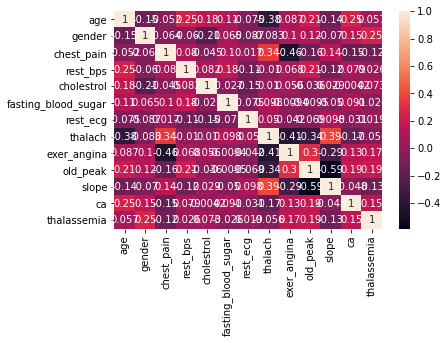

In [ ]:
sns.heatmap(x.corr(),annot=True)

In [ ]:
df['target']=df['target'].astype('category')

In [ ]:
df=df.sample(n=62)
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
148,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
51,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
131,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
115,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
67,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0


# Building logistic Regression model

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((193, 13), (49, 13), (193,), (49,))

In [ ]:
lo=LogisticRegression(max_iter=1000)

In [ ]:
model1=lo.fit(xtrain,ytrain)

In [ ]:
train_pred_lo=lo.predict(xtrain)
train_pred_lo

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
test_pred_lo=lo.predict(xtest)
test_pred_lo

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1], dtype=int64)

In [ ]:
confusion_matrix(ytrain,train_pred_lo)

array([[68, 20],
       [12, 93]], dtype=int64)

In [ ]:
confusion_matrix(ytest,test_pred_lo)

array([[16,  6],
       [ 4, 23]], dtype=int64)

In [ ]:
accuracy_score(ytrain,train_pred_lo)

0.8341968911917098

In [ ]:
accuracy_score(ytest,test_pred_lo)

0.7959183673469388

In [ ]:
print(classification_report(ytrain,train_pred_lo))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        88
           1       0.82      0.89      0.85       105

    accuracy                           0.83       193
   macro avg       0.84      0.83      0.83       193
weighted avg       0.84      0.83      0.83       193



In [ ]:
print(classification_report(ytest,test_pred_lo))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.79      0.85      0.82        27

    accuracy                           0.80        49
   macro avg       0.80      0.79      0.79        49
weighted avg       0.80      0.80      0.79        49



In [ ]:
crossval_lo=cross_val_score(lo,xtrain,ytrain,cv=5)
crossval_lo

array([0.87179487, 0.79487179, 0.79487179, 0.84210526, 0.73684211])

C:\Users\SRILEKYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

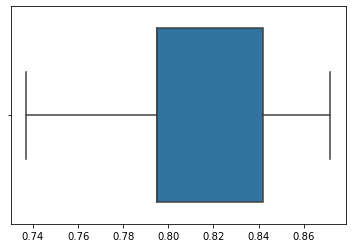

In [ ]:
sns.boxplot(crossval_lo)

# 

In [ ]:
x_test=pd.read_csv('test.csv')
x_test

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,57,1,0,140,192,0,1,148,0,0.4,1,0,1
1,43,1,2,130,315,0,1,162,0,1.9,2,1,2
2,57,1,0,132,207,0,1,168,1,0.0,2,0,3
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2
4,35,1,0,120,198,0,1,130,1,1.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,0,1,130,236,0,0,174,0,0.0,1,1,2
57,58,1,2,112,230,0,0,165,0,2.5,1,1,3
58,58,0,0,100,248,0,0,122,0,1.0,1,0,2
59,44,0,2,118,242,0,1,149,0,0.3,1,1,2


In [ ]:
y_pred_lo=lo.predict(x_test)
y_pred_lo

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
#pd.DataFrame(y_pred_lo).to_csv('Sample_Srilekya.csv',index=False)

# Decision Tree Model

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((193, 13), (49, 13), (193,), (49,))

In [ ]:
mm=MinMaxScaler()
xtrain1=mm.fit_transform(xtrain)
xtrain1

array([[0.64285714, 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.61904762, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.4047619 , 1.        , 1.        , ..., 1.        , 0.25      ,
        0.66666667],
       ...,
       [0.5952381 , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.5952381 , 1.        , 0.        , ..., 1.        , 0.25      ,
        1.        ],
       [0.33333333, 1.        , 0.        , ..., 0.5       , 0.        ,
        1.        ]])

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy', min_samples_split=10,max_depth=2,random_state=42)

In [ ]:
model2=dt.fit(xtrain,ytrain)

In [ ]:
train_pred_dt=dt.predict(xtrain)
train_pred_dt

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
test_pred_dt=dt.predict(xtest)
test_pred_dt

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1], dtype=int64)

In [ ]:
confusion_matrix(ytrain,train_pred_dt)

array([[73, 15],
       [22, 83]], dtype=int64)

In [ ]:
confusion_matrix(ytest,test_pred_dt)

array([[15,  7],
       [12, 15]], dtype=int64)

In [ ]:
print(classification_report(ytrain,train_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        88
           1       0.85      0.79      0.82       105

    accuracy                           0.81       193
   macro avg       0.81      0.81      0.81       193
weighted avg       0.81      0.81      0.81       193



In [ ]:
print(classification_report(ytest,test_pred_dt))

              precision    recall  f1-score   support

           0       0.56      0.68      0.61        22
           1       0.68      0.56      0.61        27

    accuracy                           0.61        49
   macro avg       0.62      0.62      0.61        49
weighted avg       0.63      0.61      0.61        49



In [ ]:
crossval_dt=cross_val_score(dt,xtrain,ytrain,cv=5)
crossval_dt

array([0.79487179, 0.76923077, 0.71794872, 0.73684211, 0.81578947])

C:\Users\SRILEKYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

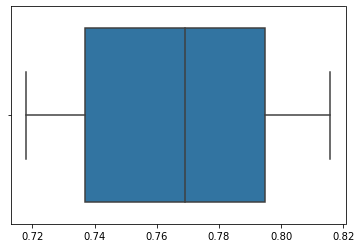

In [ ]:
sns.boxplot(crossval_dt)

# Random Forest model

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((193, 13), (49, 13), (193,), (49,))

In [ ]:
mm=MinMaxScaler()
xtrain1=mm.fit_transform(xtrain)
xtrain1

array([[0.53191489, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.25531915, 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.33333333],
       [0.4893617 , 1.        , 0.        , ..., 1.        , 0.75      ,
        1.        ],
       ...,
       [0.46808511, 1.        , 0.66666667, ..., 1.        , 0.25      ,
        1.        ],
       [0.57446809, 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.33333333],
       [0.34042553, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667]])

In [ ]:
rf=RandomForestClassifier(max_depth=2,min_samples_split=10,criterion='entropy',random_state=42)

In [ ]:
model3=rf.fit(xtrain,ytrain)

In [ ]:
train_pred_rf=rf.predict(xtrain)
train_pred_rf

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [ ]:
test_pred_rf=rf.predict(xtest)
test_pred_rf

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1], dtype=int64)

In [ ]:
confusion_matrix(ytrain,train_pred_rf)

array([[68, 20],
       [ 7, 98]], dtype=int64)

In [ ]:
confusion_matrix(ytest,test_pred_rf)

array([[16,  6],
       [ 1, 26]], dtype=int64)

In [ ]:
print(classification_report(ytrain,train_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        88
           1       0.83      0.93      0.88       105

    accuracy                           0.86       193
   macro avg       0.87      0.85      0.86       193
weighted avg       0.87      0.86      0.86       193



In [ ]:
print(classification_report(ytest,test_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.81      0.96      0.88        27

    accuracy                           0.86        49
   macro avg       0.88      0.85      0.85        49
weighted avg       0.87      0.86      0.85        49



In [ ]:
crossval_rf=cross_val_score(rf,xtrain,ytrain,cv=5)
crossval_rf

array([0.82051282, 0.84615385, 0.82051282, 0.76315789, 0.78947368])

C:\Users\SRILEKYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

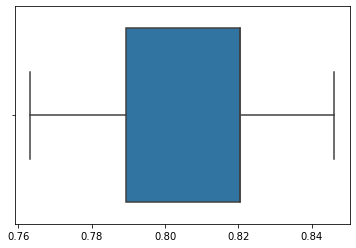

In [ ]:
sns.boxplot(crossval_rf)

In [ ]:
crossval=pd.DataFrame({'logistic':crossval_lo,'Decision Tree':crossval_dt,'Random Forest':crossval_rf})
crossval

,logistic,Decision Tree,Random Forest
0,0.871795,0.794872,0.820513
1,0.794872,0.769231,0.846154
2,0.794872,0.717949,0.820513
3,0.842105,0.736842,0.763158
4,0.736842,0.815789,0.789474


<AxesSubplot:>

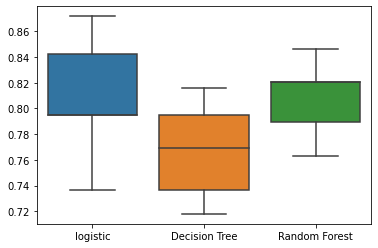

In [ ]:
#comparing the boxplot of three models
sns.boxplot(data=crossval)

- From this, Random Forest will be the best model

In [ ]:
model=rf.fit(x,y)

In [ ]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
#pd.DataFrame(y_pred_rf).to_csv('Submissiom_Srilekya.csv',index=False)